## Observations and Insights 

In [ ]:
# # Observations

# 1. It appeared that Capomulin and Ramicane resulted in smaller tumour volumes overall, which implies that they are the more
# effective medications, whereas Infubinol and Ceftamin resulted in mice with larger volumes, which is indicative that they
# were less effective at treating tumours. The efficacy of Capomulin is demonstrated again in the selection of a random mouse
# treated with Capomulin, which shows a decrease in tumour size over time. This observation only accounts for the 
# four treatments of Capomulin, Ramicane, Infubinol and Ceftamin though. 

# 2. It appeared that, despite the previous observation, there is a strong correlation between mouse weight and tumour volume,
# that is, the heavier the mouse, the larger the tumour.

# 3. Capomulin and Ramicane have most likely been ascertained as being more reliable treatments as there were more trials
# involving those two regimes than the others. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
all_mice = len(merged_df["Mouse ID"].unique())
all_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicates = merged_df.duplicated(subset=['Mouse ID','Timepoint'])
find_duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
#find_duplicates referenced in its entirety to show values that returned 'True' for .duplicated() function
duplicated_ids = merged_df.loc[find_duplicates,'Mouse ID']
duplicated_ids

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
#set Mouse ID as index so that we can drop g989 as an entire index
indexed_by_mouseid = merged_df.set_index('Mouse ID')
indexed_by_mouseid

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mouse = indexed_by_mouseid.drop(index = 'g989')
dropped_mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
new_data = dropped_mouse.reset_index()
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Optional: Get all the data for the duplicate mouse ID.

In [9]:
# Checking the number of mice in the clean DataFrame.
all_mice_cleaned = len(new_data["Mouse ID"].unique())
all_mice_cleaned

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumour_data = new_data.loc[:,["Drug Regimen","Tumor Volume (mm3)"]]
tumour_data

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1875,Naftisol,63.145652
1876,Naftisol,65.841013
1877,Naftisol,69.176246
1878,Naftisol,70.314904


In [11]:
tumour_mean = tumour_data.groupby("Drug Regimen").mean()
tumour_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [12]:
tumour_median = tumour_data.groupby("Drug Regimen").median()
tumour_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [13]:
tumour_variance = tumour_data.groupby("Drug Regimen").var()
tumour_variance

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [14]:
tumour_std = tumour_data.groupby("Drug Regimen").std()
tumour_std

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [15]:
tumour_sem = tumour_data.groupby("Drug Regimen").sem()
tumour_sem

#each variable can be thought of as a list, so creating a dataframe is like a dictionary of lists

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [16]:
# #Summary statistics table
summary1 = pd.DataFrame({"Mean":tumour_mean["Tumor Volume (mm3)"], "Median":tumour_median["Tumor Volume (mm3)"],"Variance":tumour_variance["Tumor Volume (mm3)"],"SD":tumour_std["Tumor Volume (mm3)"],"SEM":tumour_sem["Tumor Volume (mm3)"]})
summary1

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggregated_summary = tumour_data.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
aggregated_summary

# This method produces everything in a single groupby function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# mousenumbers_data = new_data.loc[:,["Drug Regimen"]].value_counts()
# mousenumbers_data

mousenumbers_data = new_data["Drug Regimen"].value_counts()
mousenumbers_data

# mousenumbers_data_df = pd.DataFrame({"Total Mice":mousenumbers_data})
# mousenumbers_data_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:>

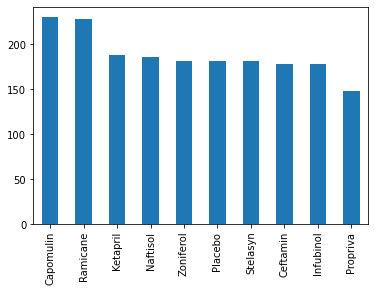

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
bar1 = mousenumbers_data.plot(kind="bar")
bar1

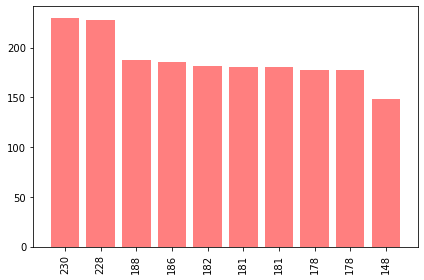

In [48]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mousenumbers_data))
# tick_locations = [value for value in x_axis]

plt.bar(x_axis,mousenumbers_data,color='r',alpha=0.5,align='center')
plt.xticks(tick_locations, mousenumbers_data, rotation="vertical")
plt.tight_layout()


In [22]:
mousesex_data = new_data["Sex"].value_counts()
mousesex_data

# mousesex_data_df = pd.DataFrame({"Total Mice":mousenumbers_data})
# mousesex_data_df



Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

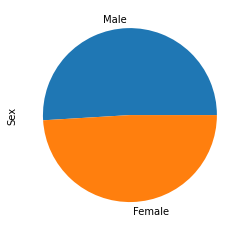

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie1 = mousesex_data.plot.pie()
pie1

([<matplotlib.patches.Wedge at 0x2f4254d1cd0>,
 [Text(-0.681404241901343, -0.8635324308437154, '958'),
  Text(0.6814042419013431, 0.8635324308437154, '922')])

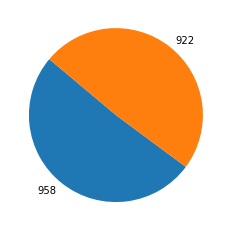

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = plt.pie(mousesex_data, labels=mousesex_data,startangle=140)
pie2

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [26]:
final_timepoints = new_data.groupby("Mouse ID").max()["Timepoint"]
final_timepoints

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [27]:
final_tumours = pd.merge(new_data,final_timepoints, on=("Timepoint","Mouse ID"), how="inner")
final_tumours

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels) (the four above)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tvs = []

In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. (for loop begins here)

for x in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes (these 3 should be in for loop)
    tvs = final_tumours.loc[final_tumours["Drug Regimen"]== x, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tvs.append(tvs)
    
    # Determine outliers using upper and lower bounds
    quartiles = tvs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tvs.loc[(tvs < lower_bound) | (tvs > upper_bound)]
    
#     print(f"Values below {lower_bound} are potential outliers.")
#     print(f"Values above {upper_bound} are potential outliers.")

    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


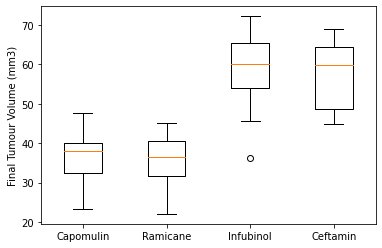

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_tvs, labels=regimens)
plt.ylabel("Final Tumour Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin1 = new_data.loc[new_data["Mouse ID"] == "s185",["Timepoint","Tumor Volume (mm3)"]]
capomulin1

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


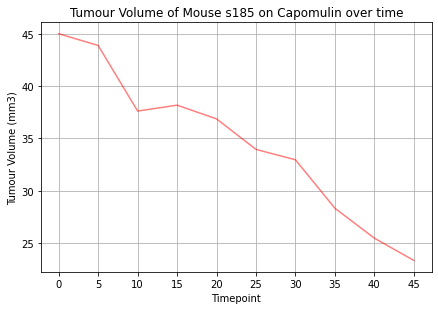

In [51]:
mouse_no = "s185"
x_axis2 = capomulin1["Timepoint"]
y_axis2 = capomulin1["Tumor Volume (mm3)"]

plt.plot(x_axis2,y_axis2,color='r',alpha=0.5)
plt.tight_layout()
plt.xticks(capomulin1["Timepoint"])
#how to get ticks to show up correctly?

plt.title(f"Tumour Volume of Mouse {mouse_no} on Capomulin over time")
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")

plt.grid()
plt.show()

In [39]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin2 = new_data.loc[new_data["Drug Regimen"] == "Capomulin",["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
by_id = capomulin2.groupby("Mouse ID").mean()
by_id

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


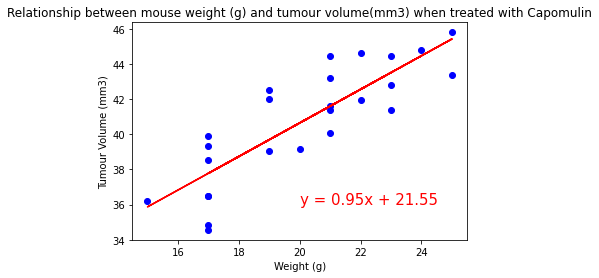

In [37]:
x_axis3 = by_id["Weight (g)"]
y_axis3 = by_id["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis3, y_axis3)
regress_values = x_axis3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.scatter(x_axis3,y_axis3,color='b',alpha=1)
plt.plot(x_axis3,regress_values,"r-")

plt.title("Relationship between mouse weight (g) and tumour volume(mm3) when treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis3, y_axis3)
# regress_values = x_axis3 * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_axis3,y_axis3)
print(f"The correlation coefficient between mouse weight and average tumour volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumour volume for the Capomulin regimen is 0.84
